In [ ]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [ ]:
import ipywidgets as widgets
from IPython.display import display

def cb(elem):
    print("hi")
button = widgets.Button(description="Connect")
button.on_click(cb)
display(button)

In [ ]:
!pip install pandas

In [ ]:
%connect

In [ ]:
import ipywidgets as widgets
from IPython.display import display

def cb(elem):
    print("hi")
button = widgets.Button(description="Connect")
button.on_click(cb)
display(button)

In [ ]:
%disconnect

Text(value='', description='Domain to ping')

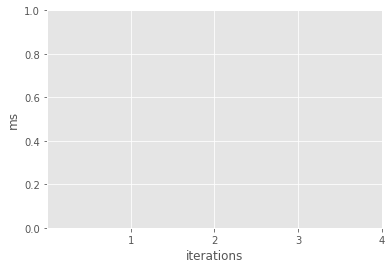

HBox()

Domain gave error on pinging


AttributeError: 'list' object has no attribute 'astype'

AttributeError: 'list' object has no attribute 'astype'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display
from IPython.html import widgets
plt.style.use('ggplot')
 
NUMBER_OF_PINGS = 4
 
# displaying the text widget
text = widgets.Text(description="Domain to ping", width=200)
display(text)
 
# preparing the plot 
data = pd.DataFrame()
x = range(1,NUMBER_OF_PINGS+1)
plots = dict()
fig, ax = plt.subplots()
plt.xlabel('iterations')
plt.ylabel('ms')
plt.xticks(x)
plt.show()
 
# preparing a container to put in created checkbox per domain
checkboxes = []
cb_container = widgets.HBox()
display(cb_container)
 
# add button that updates the graph based on the checkboxes
button = widgets.Button(description="Update the graph")
 
# function to deal with the added domain name
def handle_submit(sender):
    # a part of the magic inside python : pinging
    res = !ping -c {NUMBER_OF_PINGS} {text.value}
    hits = res.grep('64 bytes').fields(-2).s.replace("time=","").split()
    if len(hits) == 0:
        print ("Domain gave error on pinging")
    else:
         # rebuild plot based on ping result
        data = hits
        data = data.astype(float)
        plots, = ax.plot(x, data, label=text.value)
        plt.legend()
        plt.draw()
        # add a new checkbox for the new domain
        checkboxes.append(widgets.Checkbox(description = text.value, value=True, width=90))
        cb_container.children=[i for i in checkboxes]
        if len(checkboxes) == 1:
            display(button)
 
# function to deal with the checkbox update button       
def on_button_clicked(b):
    for c in cb_container.children:
        if not c.value:
            plots.set_visible(False)
        else:
            plots.set_visible(True)
    plt.legend()
    plt.draw()
 
button.on_click(on_button_clicked)
text.on_submit(handle_submit)
plt.show()
from IPython.display import HTML

In [ ]:
import ipywidgets as widgets

out = widgets.Output(layout={'border': '1px solid black'})
@out.capture(clear_output=True, wait=True)
def handle_click(button):
    kernel.disconnect()
    kernel.connect(copy.deepcopy(kernel.last_used_backend))
    kernel.do_execute(code, True)
    widgs = []
    widgs.append(button)
    ipydisplay(widgets.VBox(widgs))
    

button = widgets.Button(description="Next Step")
button.on_click(handle_click)
widgs = []
widgs.append(button)
ipydisplay(widgets.VBox(widgs))

In [ ]:
import ipywidgets as widgets

out = widgets.Output(layout={'border': '1px solid black'})

def function_with_captured_output():
    print('This goes into the output widget')
    raise Exception('As does this')

function_with_captured_output()

In [1]:
from io import BytesIO
from PIL import Image
from numpy import ones, zeros
import matplotlib
from IPython.display import display, Image
matplotlib.use('Agg')
from matplotlib import pyplot as plt
try:
    from base64 import encodebytes, decodebytes
except ImportError:
    from base64 import encodestring as encodebytes, decodebytes

In [2]:
from IPython.display import display, Image
import ipywidgets as widgets
from traitlets import Unicode, validate, Int

In [3]:
def to_img_buffer(arr, fmt="JPEG"):
    im = plt.imshow(arr)
    bio = BytesIO()
    im.write_png(bio)
    bio.seek(0)
    return bio.read()

def display_raw_png(data):
    display(Image(data, format="png"))

In [4]:
import ipywidgets as widgets
from traitlets import Unicode, validate, Int

In [5]:
class TrackballWidget(widgets.DOMWidget):
    _view_name = Unicode('TrackballView').tag(sync=True)
    _view_module = Unicode('trackball').tag(sync=True)
    _view_module_version = Unicode('0.0.0').tag(sync=True)
    
    width = Int(400).tag(sync=True)
    height = Int(400).tag(sync=True)
    image = Unicode('').tag(sync=True)

    def __init__(self, *args, **kwargs):
        widgets.DOMWidget.__init__(self, *args, **kwargs)
        self.on_msg(self._handle_msg)
        self.state = zeros([self.width, self.height])
        self.state[20:30,:] = 1
        self._update_image()
        
    def _update_image(self):
        self.image = encodebytes(to_img_buffer(self.state));
        
    def _add_cube(self, x0, y0, x1, y1, val=1):
        x_min, x_max = (x0,x1) if x0 < x1 else (x1,x0)
        y_min, y_max = (y0,y1) if y0 < y1 else (y1,y0)
        self.state[int(y_min):int(y_max), int(x_min):int(x_max)] = val

    def _handle_msg(self, msg, *args, **kwargs):
        content = msg["content"]["data"]["content"]
        print(content)
        if "move" in content:
            prev = content["move"]["prev"]
            cur = content["move"]["cur"]
            self._add_cube(prev["x"], prev["y"], cur["x"], cur["y"])
            self._update_image()
        elif 'keypress' in content:
            code = content['code']
            if code == 87: #W
            elif code == 65: #A
            elif code == 83: #S
            elif code == 68: #D
    
    def on_key_press(self, content):
        print("Key {c}".format(c=content['code']))

In [21]:
%%javascript
require.undef('trackball')

define('trackball', ['@jupyter-widgets/base', ], function(widgets) {       
    var trackball_view = widgets.DOMWidgetView.extend({
        render: function() {
            this.canvas = document.createElement('canvas');
            this.context = this.canvas.getContext('2d');
            this.canvas.width = this.model.get('width');
            this.canvas.height = this.model.get('height');
            this.canvas.tabIndex = 1;

            let is_mouse_down = false;
            let prev_coords = {x: 0, y: 0};
            var that = this;
            // send less update events
            var update_delay = 2;
            var updates = 0;
            

            function get_canvas_xy(e) {
                let x = e.clientX;
                let y = e.clientY;
                let bound = that.canvas.getBoundingClientRect();

                return {x: x-bound.left, y: y-bound.top};
            }

            this.canvas.addEventListener('mousedown', function(e) {
                is_mouse_down = true;
                prev_coords = get_canvas_xy(e);
            });

            this.canvas.addEventListener('mouseup', function(e) {
                is_mouse_down = false;
            });

            this.canvas.addEventListener('mousemove', function(e) {
                if (!is_mouse_down) { return; }
                if (updates < update_delay) {
                    updates++;
                    return;
                }
                let coords = get_canvas_xy(e);
                that.send({'move': {'cur': coords, 'prev': prev_coords}});
                prev_coords = coords;
                updates = 0;
            });
            
            this.el.append(this.canvas);
            this.model.on('change:image', this.update, this);
            this.update();
        },
        update: function() {
            let buffer = this.model.get('image');
            var img = new Image;
            img.src = "data:image/png;base64," + buffer;
            var that = this;
            img.onload = function() {
                that.context.clearRect(0, 0, that.canvas.width, that.canvas.height);
                that.context.drawImage(img, 0, 0, that.canvas.width, that.canvas.width);
            };
        },
        events: {
            'keydown': 'keydown',
        },
        keydown: function(e) {
            var code = e.keyCode || e.which;
            this.send({event: 'keypress', code: code});
        }
    });
        
    return {TrackballView: trackball_view};
})

<IPython.core.display.Javascript object>

In [22]:
s = TrackballWidget()

In [23]:
s

TrackballWidget(image='iVBORw0KGgoAAAANSUhEUgAAAZAAAAGQCAYAAACAvzbMAAAABHNCSVQICAgIfAhkiAAABbJJREFU\neJzt3bENw…

{'event': 'keypress', 'code': 68}
{'event': 'keypress', 'code': 70}
{'event': 'keypress', 'code': 68}
{'event': 'keypress', 'code': 70}
{'event': 'keypress', 'code': 68}
{'event': 'keypress', 'code': 70}
{'event': 'keypress', 'code': 39}
{'event': 'keypress', 'code': 37}
{'event': 'keypress', 'code': 38}
{'event': 'keypress', 'code': 40}
{'event': 'keypress', 'code': 40}
{'event': 'keypress', 'code': 40}
{'event': 'keypress', 'code': 40}
{'event': 'keypress', 'code': 38}
{'event': 'keypress', 'code': 40}
{'event': 'keypress', 'code': 38}
{'event': 'keypress', 'code': 40}
{'event': 'keypress', 'code': 38}
{'event': 'keypress', 'code': 40}
{'event': 'keypress', 'code': 38}
{'event': 'keypress', 'code': 40}
{'move': {'cur': {'x': 71.39999389648438, 'y': 153.66668701171875}, 'prev': {'x': 74.39999389648438, 'y': 146.66668701171875}}}
{'move': {'cur': {'x': 86.39999389648438, 'y': 223.66668701171875}, 'prev': {'x': 71.39999389648438, 'y': 153.66668701171875}}}
{'move': {'cur': {'x': 113.399

In [24]:
import os.path
from jupyter_core.paths import jupyter_config_dir

jupyter_dir = jupyter_config_dir()
custom_js_path = os.path.join(jupyter_dir, 'custom', 'custom.js')
#  my custom js
if os.path.isfile(custom_js_path):
    with open(custom_js_path) as f:
        print(f.read())
else:
    print("You don't have a custom.js file")

You don't have a custom.js file
